In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the first exercise and save the final dataset.

In [2]:
X = pd.read_csv('../Homework1/students_score_clean.csv')
X.head()

Unnamed: 0  StudentId  Gender  EthnicGroup  ParentEduc     LunchType  \
0         0.0   520645.0  female            2           1      standard   
1         1.0   303683.0  female            2           5      standard   
2         2.0   457351.0  female            1           3      standard   
3         3.0   812988.0    male            0           0  free/reduced   
4         4.0   594678.0    male            2           5      standard   

   TestPrep  ParentMaritalStatus  PracticeSport  IsFirstChild  NrSiblings  \
0         1                    1              1             1         3.0   
1         1                    1              2             1         0.0   
2         1                    2              2             1         4.0   
3         1                    1              0             0         1.0   
4         1                    1              2             1         0.0   

   TransportMeans  WklyStudyHours  MathScore  ReadingScore  WritingScore  \
0               1               1       71.0          71.0          74.0   
1               2               0       69.0          90.0          88.0   
2               1               1       87.0          93.0          91.0   
3               2               0       45.0          56.0          42.0   
4               1               0       76.0          78.0          75.0   

   Gender_female  Gender_male  LunchType_free/reduced  LunchType_standard  
0            1.0          0.0                     0.0                 1.0  
1            1.0          0.0                     0.0                 1.0  
2            1.0          0.0                     0.0                 1.0  
3            0.0          1.0                     1.0                 0.0  
4            0.0          1.0                     0.0                 1.0

2. a) Draw a histogram of values for the feature MathScore. Set the number of bins to 20. <br>
   b) With a vertical dashed red line denote the median value and with a vertical dashed green line denote the mean value. Set labels for each.<br>
   c) Title the figure "MathScore Histogram". Add proper x and y axis labels. <br>
   d) Add a grid. <br>
   e) Add a legend, place it in the top left corner.

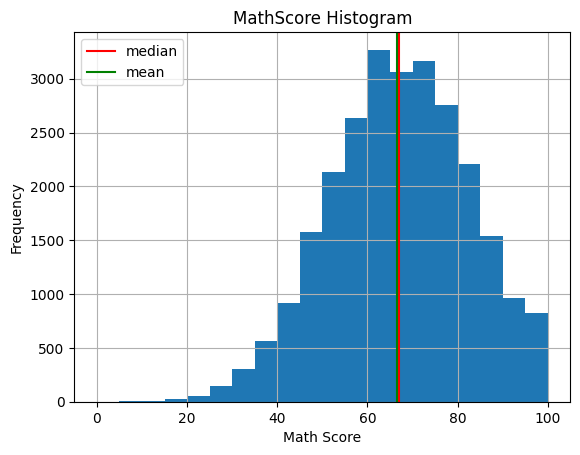

In [3]:
# a)
plt.hist(X.MathScore, bins=20)

# b)
plt.axvline(X.MathScore.median(), color = 'red', label = "median")
plt.axvline(X.MathScore.mean(), color = 'green', label = "mean")

# c)
plt.title('MathScore Histogram')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

# d)
plt.grid()

# e)
plt.legend(loc='upper left')

plt.show()

3. a) Make a pie chart of the feature NrSiblings. <br>
   b) Display the labels for each wedge. <br>
   c) Display the percentages within edge wedge. <br>
   d) Title the figure "NrSiblings pie chart".

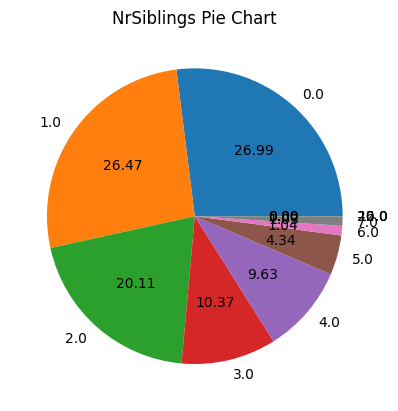

In [4]:
# a)
count_per_title = X.NrSiblings.value_counts()
percent = (count_per_title/len(X))*100

# b)
title_name = X.groupby('NrSiblings').count().index.values

# c)
plt.pie(percent, labels=title_name, autopct='%.2f')

# d)
plt.title('NrSiblings Pie Chart')
plt.show()

4. a) Create a bar chart of the average ReadingScore for each ParentEduc group. <br>
   b) Color each bar in a different color. Set the transparency of the bars to 0.7 <br>
   c) Calculate the standard deviation of the ReadingScore and add a vertical errorbar to the bar tips.

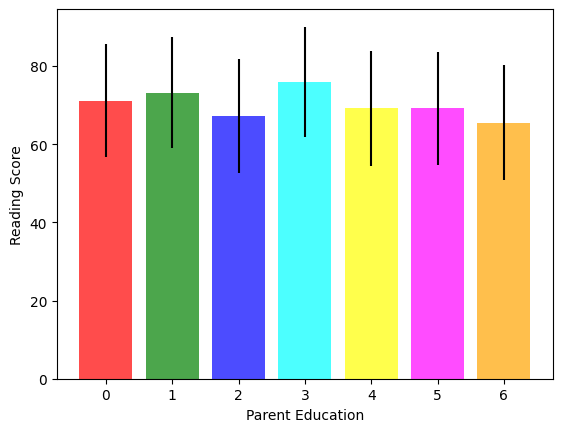

In [5]:
zero_mean = X.loc[X.loc[:,'ParentEduc'] == 0, 'ReadingScore'].mean()
zero_std = X.loc[X.loc[:,'ParentEduc'] == 0, 'ReadingScore'].std()
first_mean = X.loc[X.loc[:,'ParentEduc'] == 1, 'ReadingScore'].mean()
first_std = X.loc[X.loc[:,'ParentEduc'] == 1, 'ReadingScore'].std()
second_mean = X.loc[X.loc[:,'ParentEduc'] == 2, 'ReadingScore'].mean()
second_std = X.loc[X.loc[:,'ParentEduc'] == 2, 'ReadingScore'].std()
third_mean = X.loc[X.loc[:,'ParentEduc'] == 3, 'ReadingScore'].mean()
third_std = X.loc[X.loc[:,'ParentEduc'] == 3, 'ReadingScore'].std()
forth_mean = X.loc[X.loc[:,'ParentEduc'] == 4, 'ReadingScore'].mean()
forth_std = X.loc[X.loc[:,'ParentEduc'] == 4, 'ReadingScore'].std()
fifth_mean = X.loc[X.loc[:,'ParentEduc'] == 5, 'ReadingScore'].mean()
fifth_std = X.loc[X.loc[:,'ParentEduc'] == 5, 'ReadingScore'].std()
sixth_mean = X.loc[X.loc[:,'ParentEduc'] == 6, 'ReadingScore'].mean()
sixth_std = X.loc[X.loc[:,'ParentEduc'] == 6, 'ReadingScore'].std()

ReSc_per_PaEd_mean = [zero_mean, first_mean, second_mean, third_mean, forth_mean, fifth_mean, sixth_mean]
ReSc_per_PaEd_std = [zero_std, first_std, second_std, third_std, forth_std, fifth_std, sixth_std]

title_name = X.groupby('ParentEduc').count().index.values

plt.bar(title_name, ReSc_per_PaEd_mean, yerr=ReSc_per_PaEd_std, color = ['red', 'green', 'blue', 'cyan', 'yellow', 'magenta', 'orange'], alpha=0.7)

plt.xlabel('Parent Education')
plt.ylabel('Reading Score')
plt.show()

5. a) Make a figure divided into 2 rows and 2 columns. Set the figure size to 30 by 30. <br>
   b) In the top left axis:
       1) Draw a line graph of the students' MathScores in descending order.
       2) Color the span on the x axis for which the students' MathScores are less than 50 in red. Set transparency to 0.3.
   c) In the top right axis:
       1) Draw a scatter plot of MathScore vs ReadingScore. 
       2) Make the bubbles representing the female students yellow and the ones representing the male students purple. Add and display labels. Set transparency to 0.1.
       3) Set the size of the bubbles to be 50*NrSiblings.
   d) In the bottom left axis:
       1) Draw a boxplot of the WrittingScore feature values.
       2) Remove fliers from the boxplot.
   e) In the borrom right axis:
       1) Draw a bar plot of the number of students using each transportation method.
       2) Make the bar plot stacked by coloring the part of the bar representing the number of students which are first ch-ildren in red and the ones who arent in blue. Add and display labels.

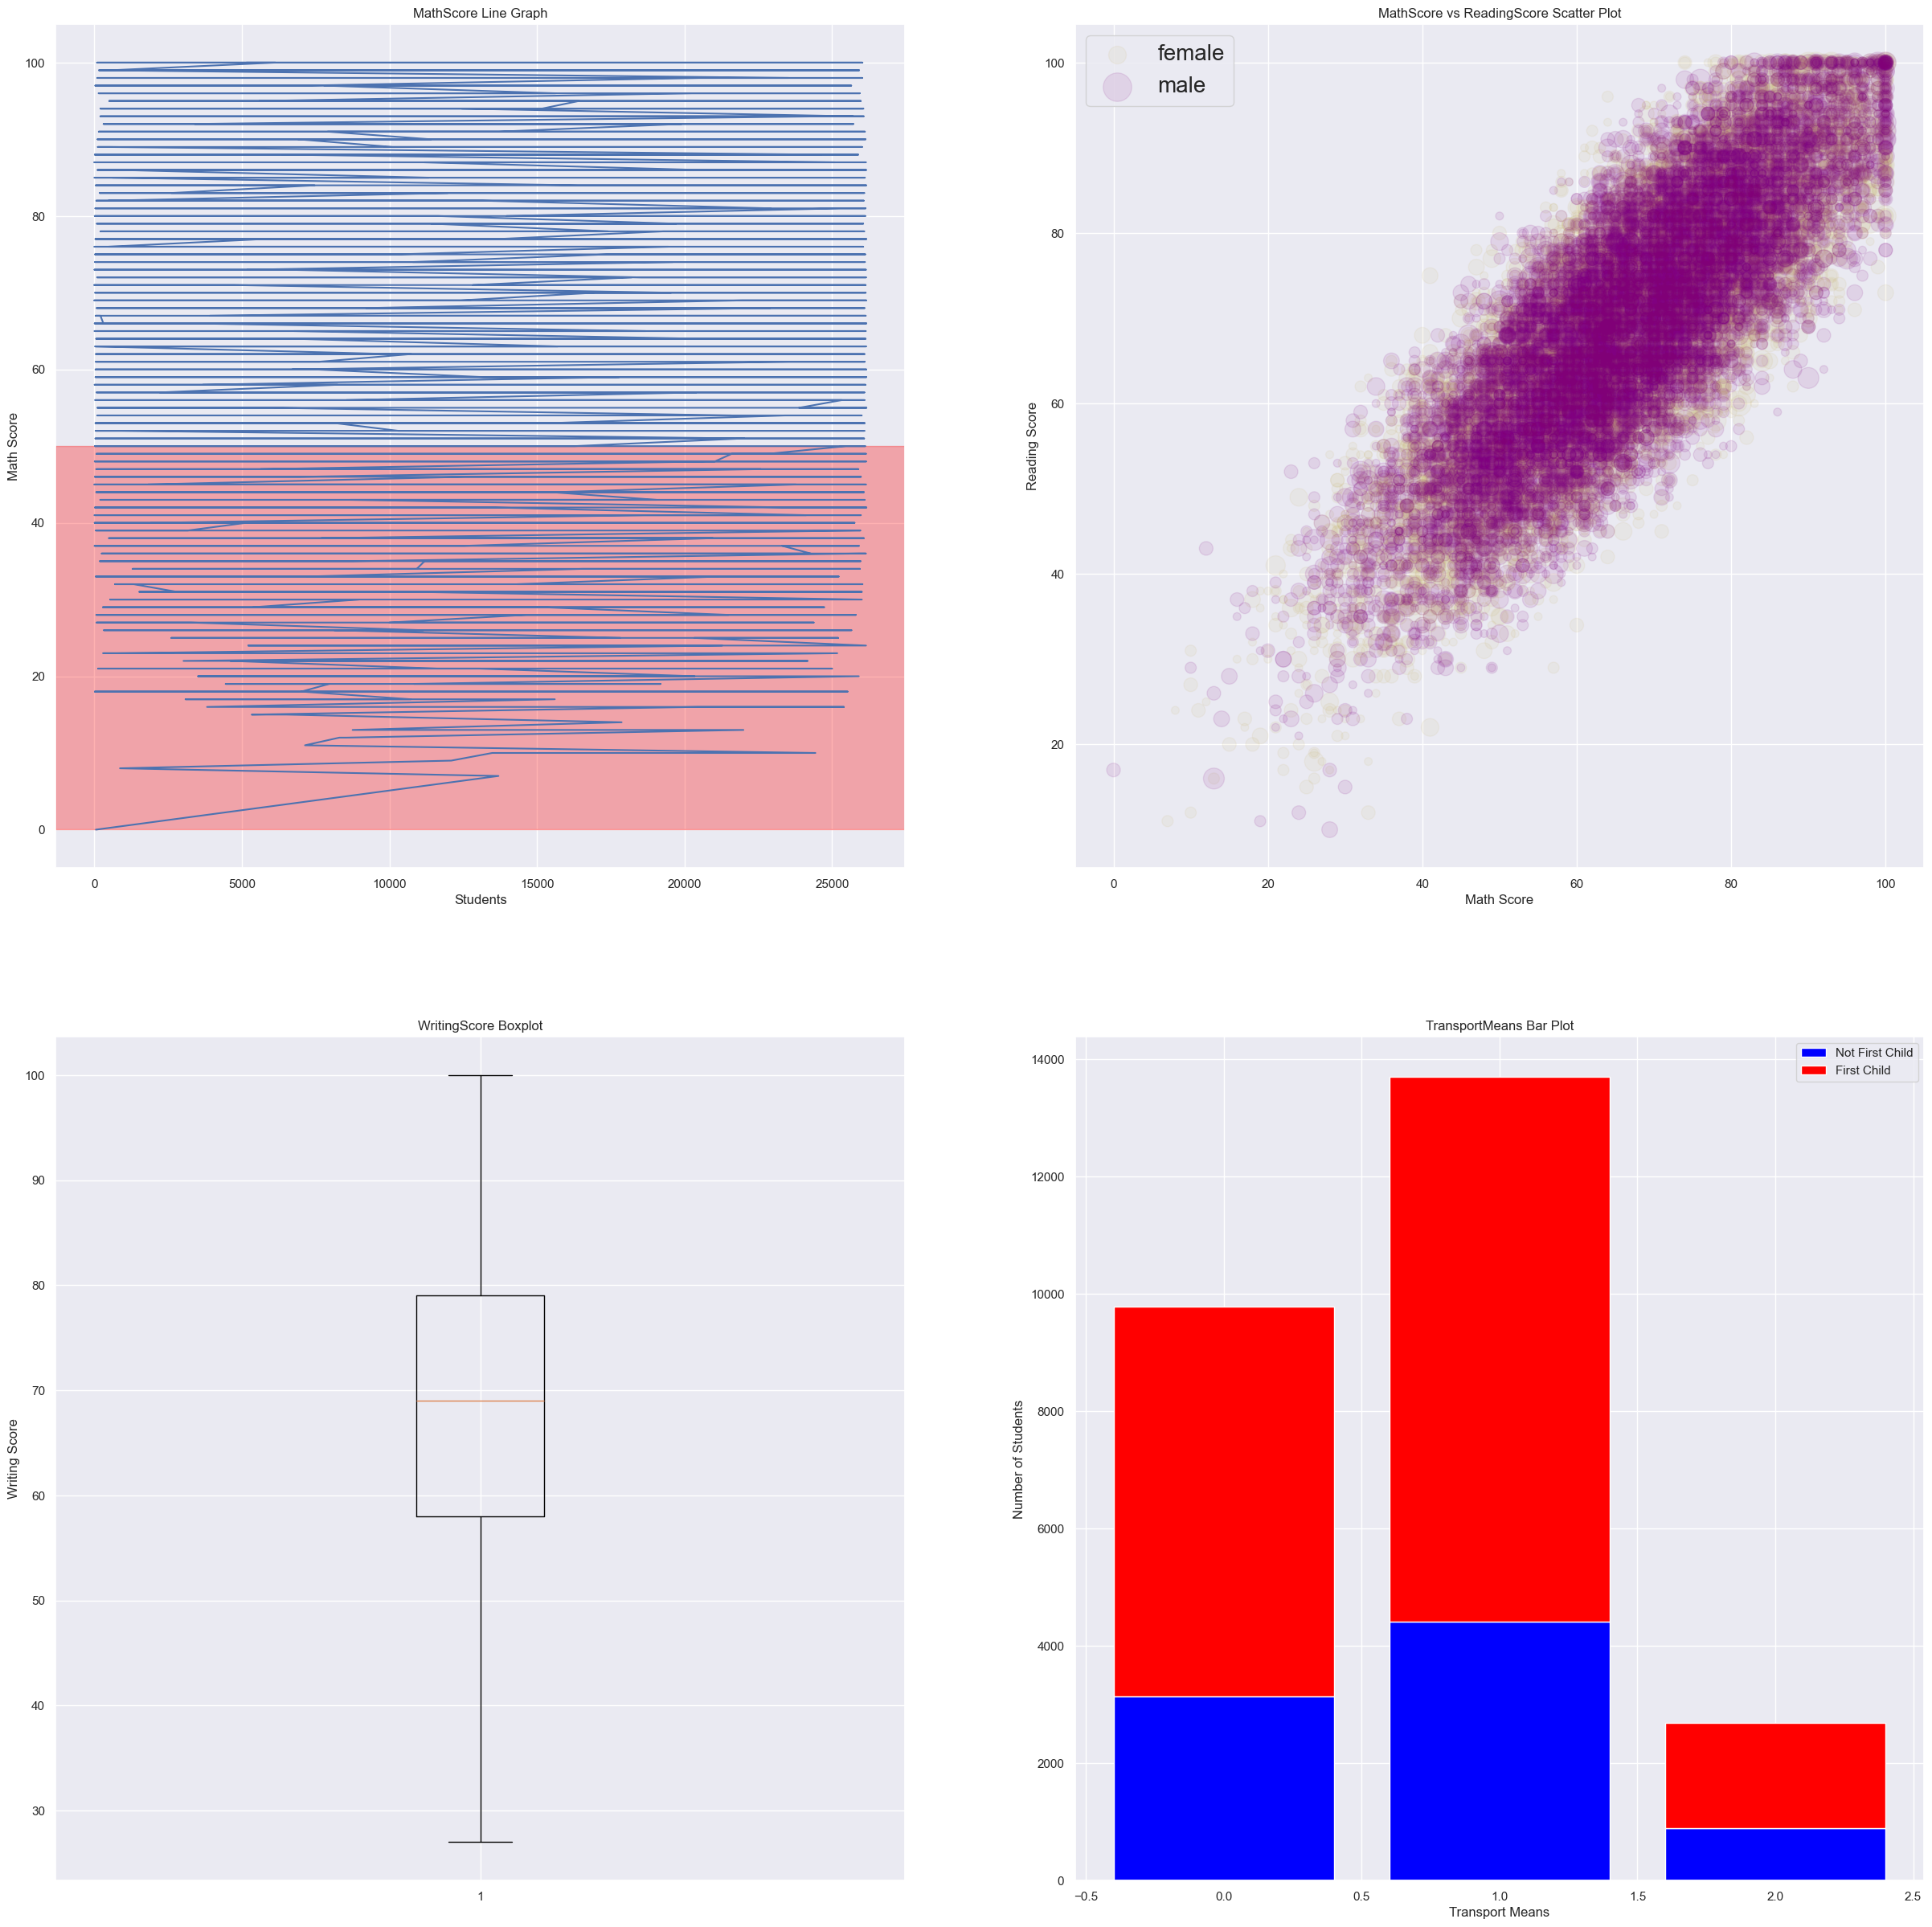

In [9]:
# a)
fig, axes = plt.subplots(2, 2, figsize=(30, 30))

# b)
axes[0, 0].plot(X.MathScore.sort_values(ascending=False))
axes[0, 0].axhspan(0, 50, alpha=0.3, color='red')
axes[0, 0].set_title('MathScore Line Graph')
axes[0, 0].set_xlabel('Students')
axes[0, 0].set_ylabel('Math Score')

# c)
# mask
mask_male = X.Gender_male == 1
# sizes
sizes = X.NrSiblings*50

axes[0, 1].scatter(X.loc[~mask_male,'MathScore'], X.loc[~mask_male,'ReadingScore'], alpha=0.1, c='y', label='female', s=sizes[~mask_male])
axes[0, 1].scatter(X.loc[mask_male,'MathScore'], X.loc[mask_male,'ReadingScore'], alpha=0.1, c='purple', label='male', s=sizes[mask_male])

axes[0, 1].set_title('MathScore vs ReadingScore Scatter Plot')
axes[0, 1].set_xlabel('Math Score')
axes[0, 1].set_ylabel('Reading Score')
axes[0, 1].legend(loc='best', fontsize=20)

# d)
axes[1, 0].boxplot(X.WritingScore, showfliers=False)
axes[1, 0].set_title('WritingScore Boxplot')
axes[1, 0].set_ylabel('Writing Score')

# e)
# mask
mask_isFirstChild = X.IsFirstChild == 1

count_per_title_notFC = X.loc[~mask_isFirstChild,:].groupby('TransportMeans').count().loc[:,'IsFirstChild'].values
count_per_title_FC = X.loc[mask_isFirstChild,:].groupby('TransportMeans').count().loc[:,'IsFirstChild'].values
title_name = X.groupby('TransportMeans').count().index.values

# plot
axes[1, 1].bar(title_name, count_per_title_notFC, color='blue', label='Not First Child')
axes[1, 1].bar(title_name, count_per_title_FC, color='red', label='First Child', bottom=count_per_title_notFC)
axes[1, 1].set_title('TransportMeans Bar Plot')
axes[1, 1].set_xlabel('Transport Means')
axes[1, 1].set_ylabel('Number of Students')
axes[1, 1].legend(loc='best')


6. a) Using seaborn, display a heatmap of the correlation coefficients between the numeric features. <br>
   b) Set the figure size to 20 by 10. <br>
   b) Make the heatmap display 2 decimal places of the values of the correlation coefficients. <br>
   c) Use the "icefire" colormap.

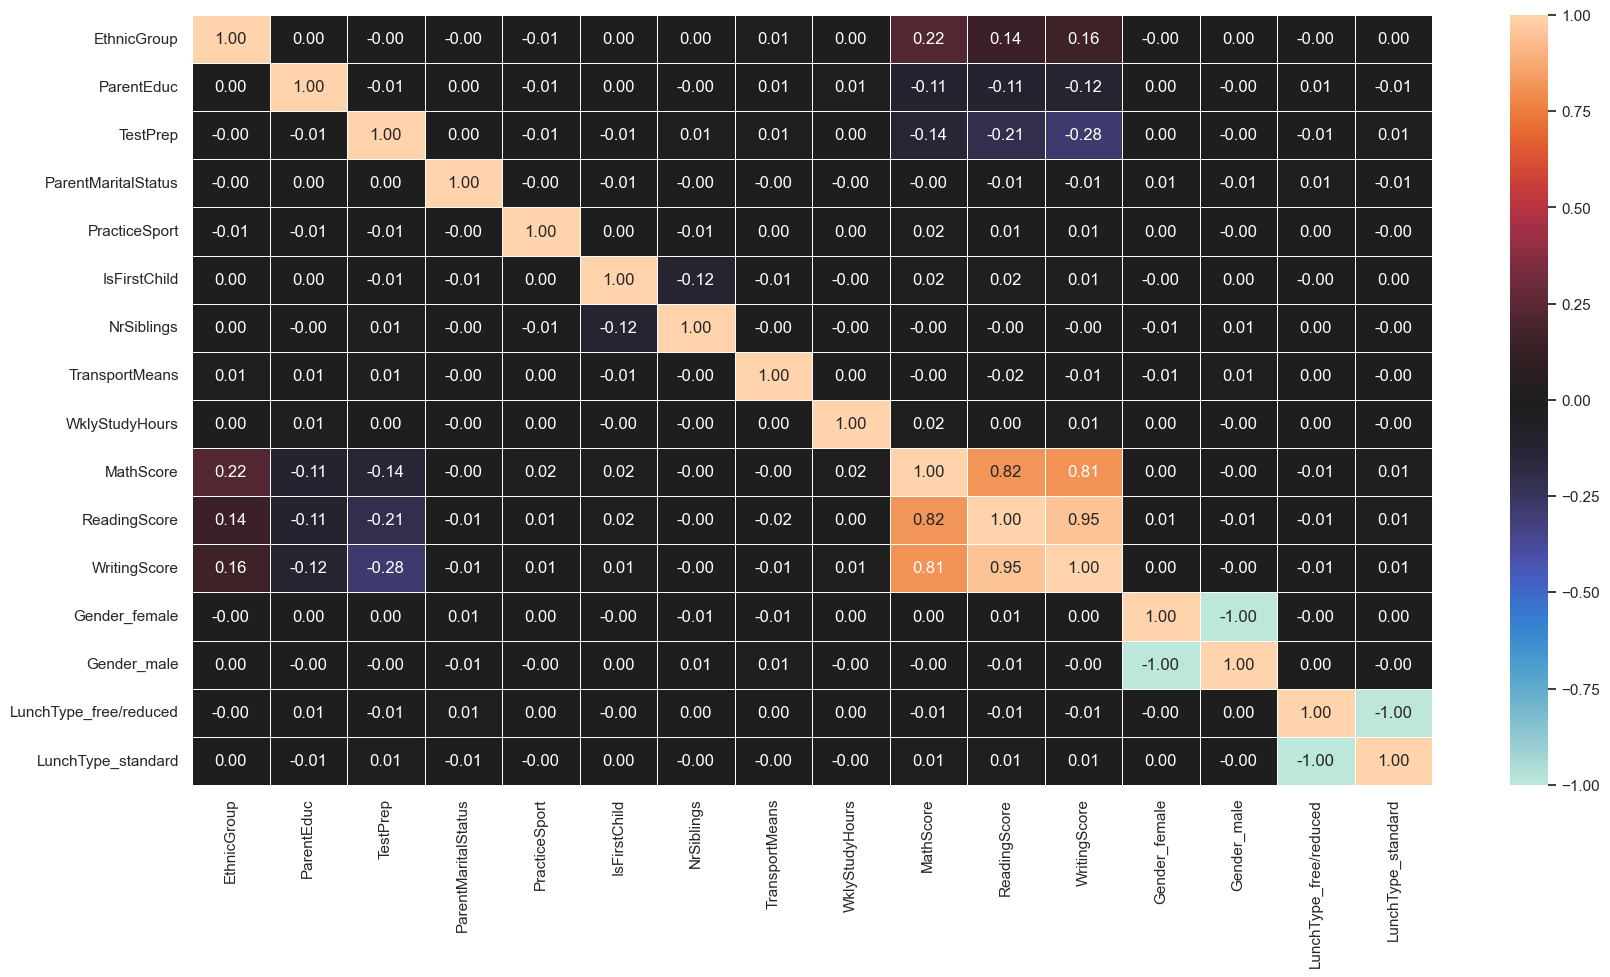

In [7]:
X_numeric = X.loc[:,~X.columns.isin(['Unnamed: 0', 'StudentId', 'Gender', 'LunchType'])]
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(X_numeric.corr(), annot=True, fmt=".2f", cmap="icefire", linewidths=.5)
plt.show()

7. a) Make a scatterplot matrix of all the features. <br>
   b) Remove mirroring scatter plots. <br>
   c) Hue the plot by gender.

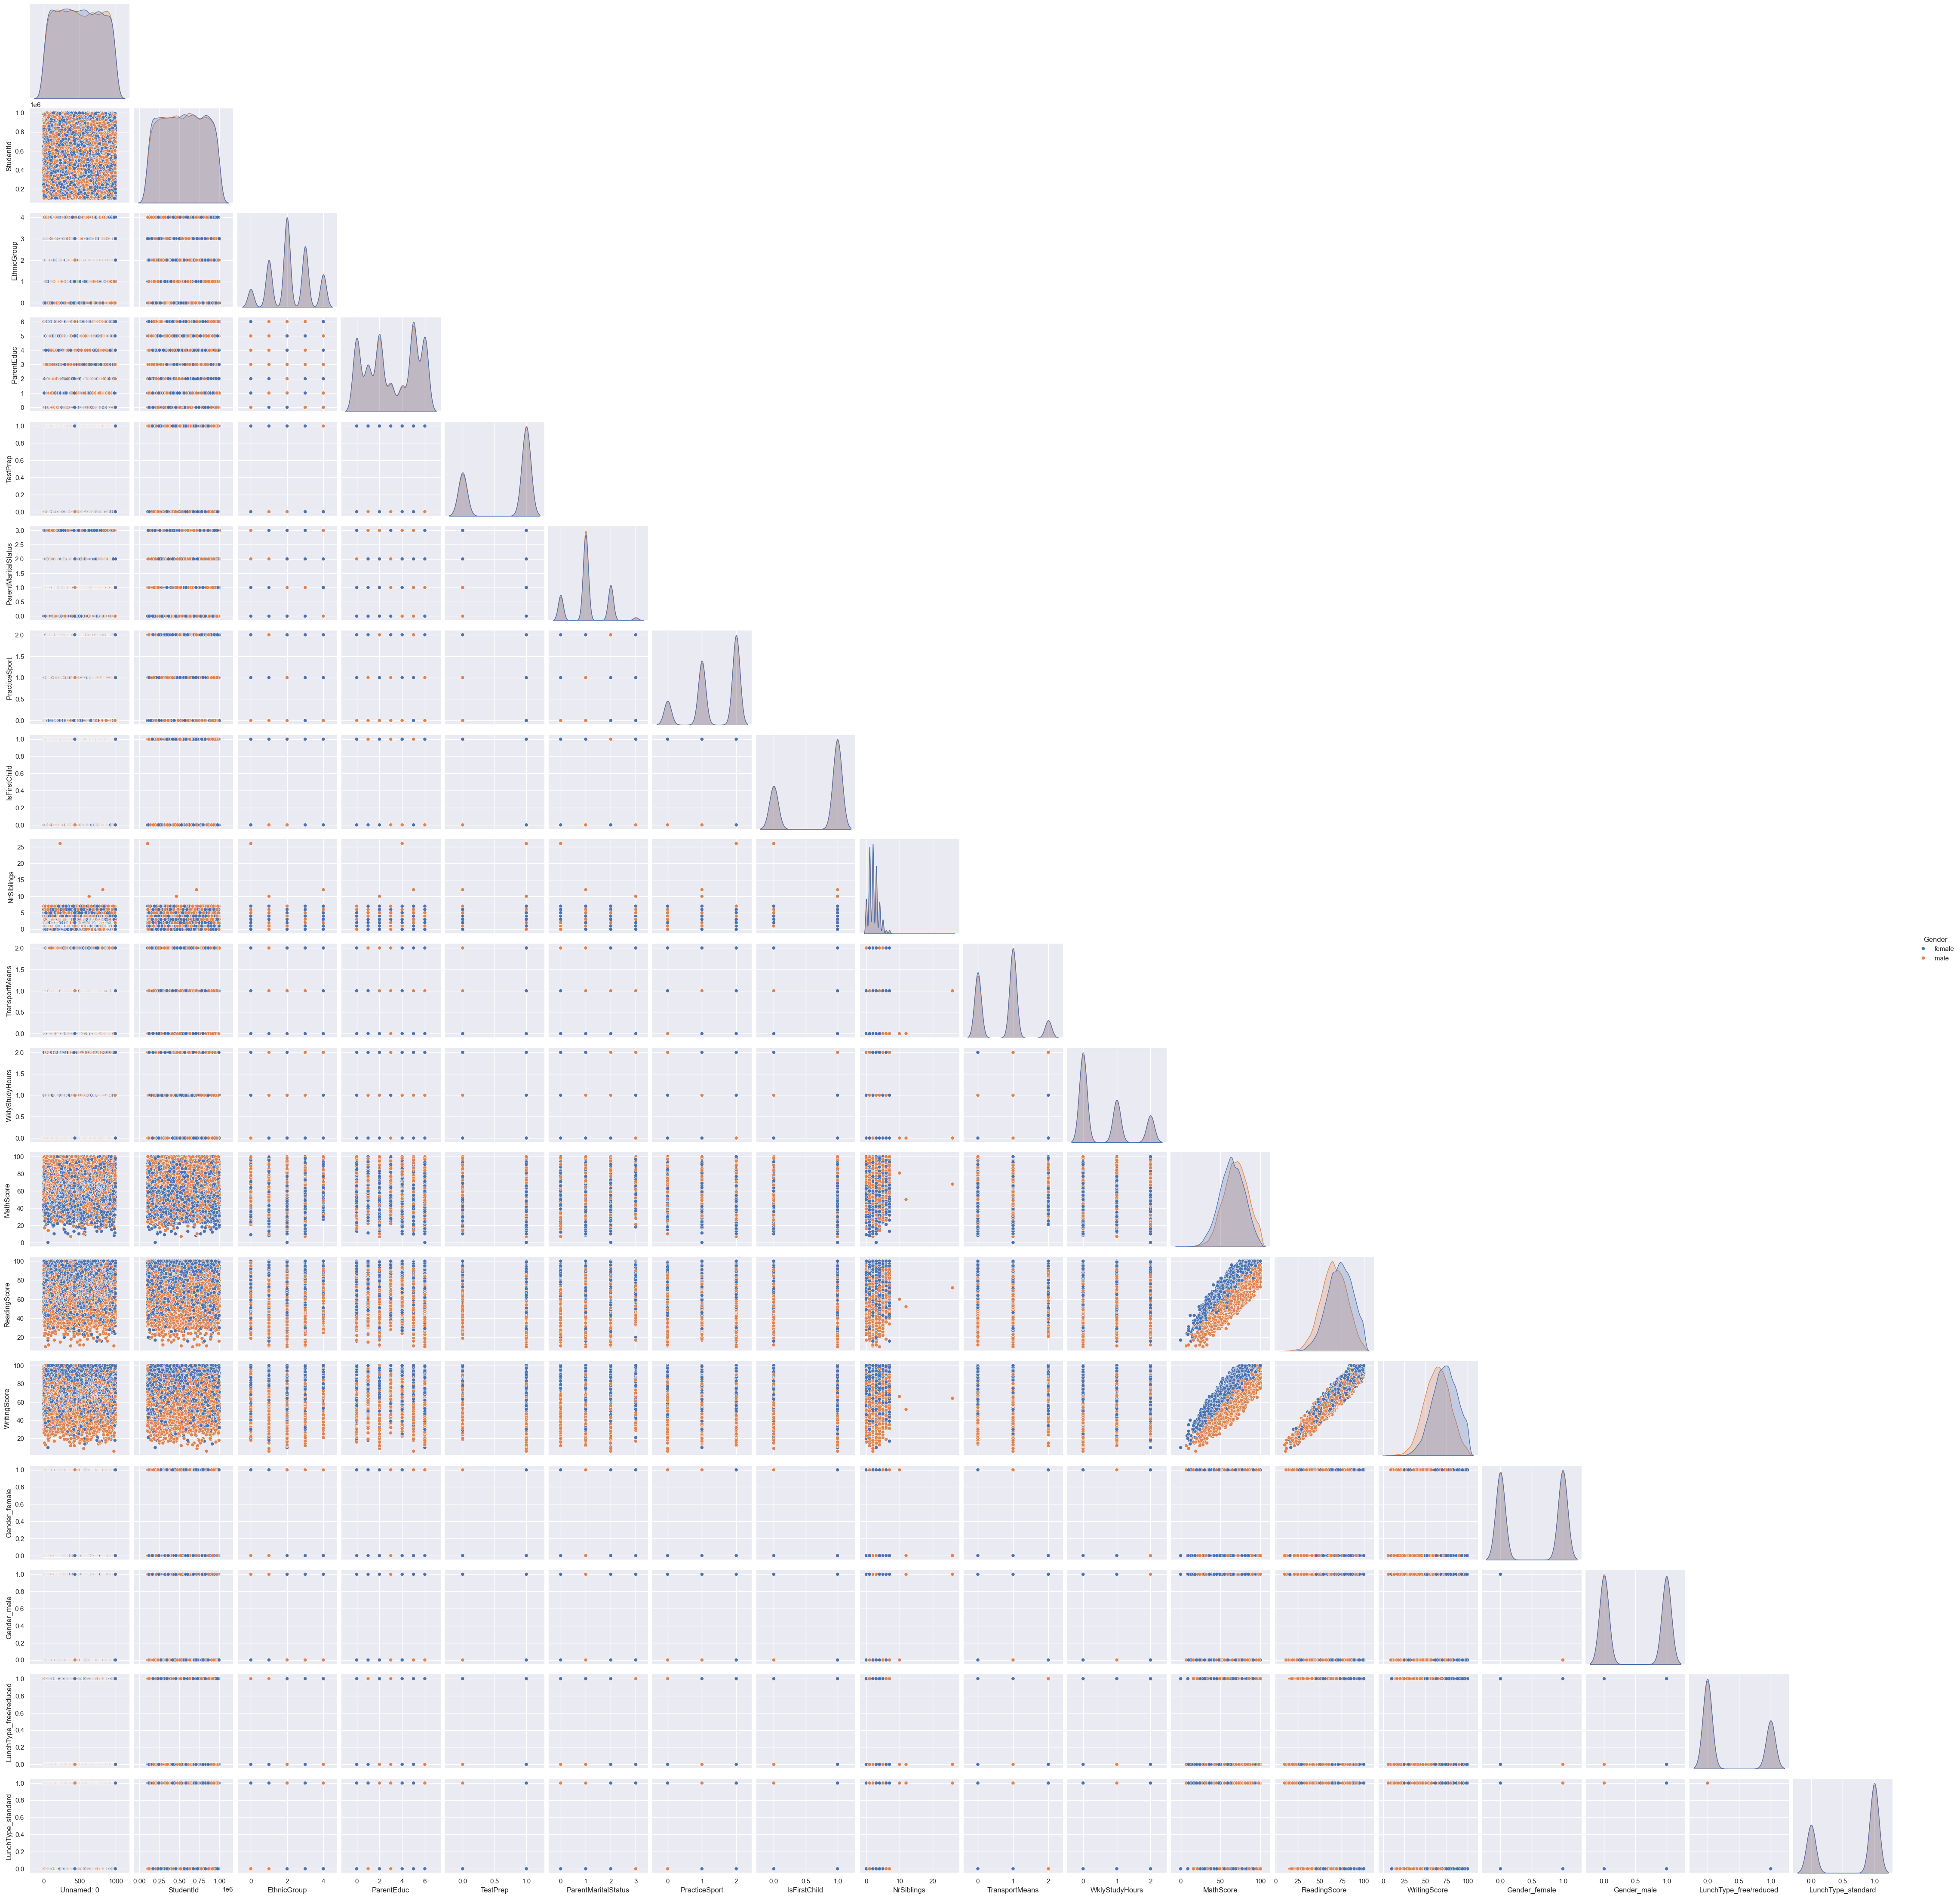

In [8]:
sns.pairplot(X.loc[:,X.columns], hue = 'Gender', corner = True)
plt.show()